In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

#print('content feature')
#print(web_features1)
#print(web_features0)
#print(len(web_features1))
#print(len(web_features0))


web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
web_not = [ind for ind,ft in enumerate(web_features1) if len(ft) <=9]
#print(web_features1[1])
web_features1 = [ft for ft in web_features1 if len(ft) >9]



unwhite_tb = pd.DataFrame(web_features1)
unwhite_tb['label'] = 1

#print(web_features0)
web_not_working2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Empty']
web_not_english2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Non-EN']
web_features0 = [ft for ft in web_features0 if len(ft) >9]


white_tb = pd.DataFrame(web_features0)
white_tb['label'] = 0

#print(len(web_features1))
#print(len(web_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

In [4]:
len(web_features1[0])

17

In [5]:
len(web_features0[0])

17

In [6]:
web_features0[0]

[23.12,
 13.6,
 13.6,
 14.49,
 12.06,
 12.8,
 18,
 10.833333333333334,
 14.09,
 3.61,
 10044.125,
 13,
 1,
 1,
 1,
 1,
 -1]

In [7]:
np.mean(y1)

label    0.336087
dtype: float64

In [8]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [12]:
clf.fit(X1,y1)

<ipython-input-12-02e4c239c946>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X1,y1)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [13]:
clf.feature_importances_

array([0.05339746, 0.04099378, 0.02234982, 0.05416652, 0.06656634,
       0.04416631, 0.05186088, 0.05810395, 0.04954916, 0.06243036,
       0.18732056, 0.1905198 , 0.02889845, 0.04245187, 0.01978851,
       0.02743622, 0.        ])

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler().fit(X1)

In [13]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(scaler.transform(X1), y1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
lr.coef_

array([[-1.18471363e+00, -1.06148833e+00, -1.16068139e-01,
        -2.22754778e+00,  1.01279832e+00,  1.91115384e+00,
         2.15982063e-01,  9.09015043e-02, -1.09672241e+00,
        -1.46397612e-01,  2.89622438e-01,  5.56988925e-01,
        -2.63790491e-01, -3.66788067e-04,  1.07213730e-01,
        -9.18435751e-02,  0.00000000e+00]])

<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-10-33b90ae4a0ac>:12: Data

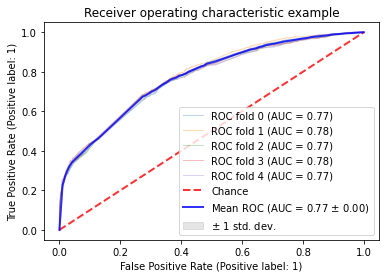

In [10]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [11]:
np.std([0.77,0.78,0.77,0.78,0.77])

0.004898979485566361

<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-13-65b716861c46>:12: Data

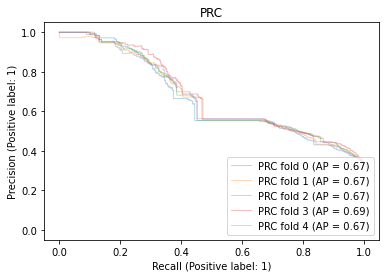

In [13]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [14]:
np.std([0.67,0.67,0.67,0.69,0.67])

0.007999999999999962

In [21]:
np.mean([0.67,0.67,0.67,0.69,0.67])

0.674

In [74]:
import numpy as np

In [75]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

#print('abstract feature')
#print(abs_features1)
#print(abs_features0)
#print(len(abs_features1))
#print(len(abs_features0))


#abs_features1 = [np.mean(np.array(ft), axis=0) for ft in abs_features1 if len([f for f in ft if len(f) == 10]) > 0]



unwhite_tb = pd.DataFrame(abs_features1)
unwhite_tb['label'] = 1

#abs_features0 = [np.mean(np.array(ft), axis=0) for ft in abs_features0 if len([f for f in ft if len(f) == 10]) > 0]


white_tb = pd.DataFrame(abs_features0)
white_tb['label'] = 0

#print(len(abs_features1))
#print(abs_features1)
#print(len(abs_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X2 = all_tb.loc[:, all_tb.columns != 'label']
y2 = all_tb.loc[:, all_tb.columns == 'label']

In [76]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [77]:
clf.fit(X2,y2)

<ipython-input-77-e75bc7e5c6b5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X2,y2)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [78]:
clf.feature_importances_

array([0.0984185 , 0.09832792, 0.06987827, 0.09933977, 0.08572095,
       0.10394539, 0.10691568, 0.10336979, 0.12804754, 0.10603617])

In [79]:
scaler = preprocessing.StandardScaler().fit(X2)

In [80]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(scaler.transform(X2), y2)
lr.coef_

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.88890851,  0.78880835, -0.49305328, -1.41029533, -0.00707696,
         1.56410904,  1.01404898, -0.13648495, -0.59147302, -1.11903746]])

<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-17-33b90ae4a0ac>:12: Data

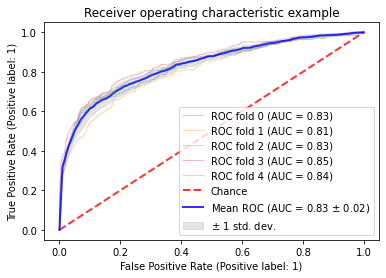

In [17]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2.iloc[train], y2.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2.iloc[test],
        y2.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-18-d4fcd02fdcb0>:12: Data

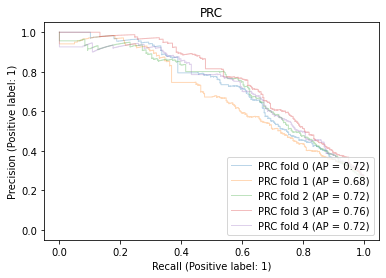

In [18]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [19]:
np.std([0.72,0.68,0.72,0.76,0.72])

0.02529822128134702

In [20]:
np.mean([0.72,0.68,0.72,0.76,0.72])

0.72

In [51]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [52]:
bibilometrics.columns

Index(['JournalId', 'NormalizedName', 'Issn', 'Reason',
       'num_journal_publication', 'num_journal_author',
       'num_journal_affiliation', 'journal_year_first_publish',
       'journal_avg_hindex', 'journal_avg_first_author_hindex',
       'journal_avg_last_author_hindex', 'journal_avg_middle_author_hindex',
       'total_num_journal_reference', 'total_num_journal_cited',
       'journal_paper_reference_num', 'journal_journal_cited_num',
       'journal_num_author_referenced', 'journal_num_author_cited',
       'journal_num_affiliation_referenced', 'journal_num_affiliation_cited',
       'journal_num_journal_self_reference',
       'journal_num_author_self_reference',
       'journal_num_affiliation_self_reference',
       'journal_num_journal_self_cited', 'journal_num_author_self_cited',
       'journal_num_affiliation_self_cited'],
      dtype='object')

In [53]:
bibilometrics.head(3)

,JournalId,NormalizedName,Issn,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2764959905,austrian journal of humanities and social scie...,Unknown,A,1364,48,48,2012,1.000000,1.000000,...,122,83,28,12,0,0,0,0,1,0
1,2764494681,austrian journal of technical and natural scie...,Unknown,A,826,36,36,2014,1.880952,2.058824,...,193,214,52,21,0,1,0,0,3,0
2,2764967488,european journal of arts,Unknown,A,372,5,5,2015,1.000000,1.000000,...,13,7,2,1,0,0,0,0,0,0


In [54]:
bibilometrics.shape

(5783, 26)

In [55]:
bibilometrics = bibilometrics.reindex(columns=['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ])

In [59]:
a = ['JournalId','NormalizedName','Issn','Reason','journal_year_first_publish',
                               'total_num_journal_cited','num_journal_publication','total_num_journal_reference','journal_num_journal_self_cited',
                              'journal_journal_cited_num','journal_paper_reference_num','journal_num_journal_self_reference',
                              'journal_avg_last_author_hindex','journal_num_author_self_cited',
                              'num_journal_author','journal_num_author_self_reference','journal_num_author_referenced',
                               'journal_avg_middle_author_hindex','journal_avg_first_author_hindex','journal_avg_hindex',
                               'journal_num_author_cited','journal_num_affiliation_cited','journal_num_affiliation_self_cited',
                               'num_journal_affiliation','journal_num_affiliation_referenced','journal_num_affiliation_self_reference'
                              ]

In [62]:
bibilometrics.shape

(5783, 26)

In [63]:
bibilometrics.head(5)

,JournalId,NormalizedName,Issn,Reason,journal_year_first_publish,total_num_journal_cited,num_journal_publication,total_num_journal_reference,journal_num_journal_self_cited,journal_journal_cited_num,...,journal_num_author_referenced,journal_avg_middle_author_hindex,journal_avg_first_author_hindex,journal_avg_hindex,journal_num_author_cited,journal_num_affiliation_cited,journal_num_affiliation_self_cited,num_journal_affiliation,journal_num_affiliation_referenced,journal_num_affiliation_self_reference
0,2764959905,austrian journal of humanities and social scie...,Unknown,A,2012,40,1364,70,0,12,...,122,0.000000,1.000000,1.000000,83,12,0,48,28,0
1,2764494681,austrian journal of technical and natural scie...,Unknown,A,2014,80,826,61,0,10,...,193,0.023898,2.058824,1.880952,214,21,0,36,52,0
2,2764967488,european journal of arts,Unknown,A,2015,13,372,10,0,1,...,13,0.000000,1.000000,1.000000,7,1,0,5,2,0
3,2764678543,european journal of biomedical and life sciences,Unknown,A,2013,9,309,105,0,4,...,459,0.072635,4.000000,3.791667,28,6,1,57,112,0
4,2764849874,european journal of economics and management s...,Unknown,A,2015,52,460,36,0,10,...,56,0.255952,1.666667,1.833333,104,20,0,16,20,0


In [64]:
white_bib = bibilometrics[bibilometrics['Reason'] == 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics[bibilometrics['Reason'] != 'Still in DOAJ index'].drop(columns=['JournalId', 'NormalizedName','Issn','Reason'])
unwhite_bib['label'] = 1

In [65]:
all_tb = pd.concat([unwhite_bib,white_bib]).reset_index(drop=True)

X6 = all_tb.loc[:, all_tb.columns != 'label']
y6 = all_tb.loc[:, all_tb.columns == 'label']

In [66]:
all_tb.shape

(5783, 23)

In [67]:
clf = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)

In [68]:
clf.fit(X6,y6)

<ipython-input-68-a264d11f1d61>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X6,y6)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [69]:
clf.feature_importances_

array([0.06285314, 0.04176573, 0.040546  , 0.03578433, 0.0377875 ,
       0.06574739, 0.03353228, 0.03597801, 0.05269779, 0.03452668,
       0.0392444 , 0.03148245, 0.03777935, 0.05141692, 0.03621149,
       0.04186143, 0.04291507, 0.06209152, 0.071949  , 0.03839192,
       0.03801426, 0.06742336])

In [72]:
scaler = preprocessing.StandardScaler().fit(X6)
lr = LogisticRegression(random_state=0,max_iter=1000).fit(scaler.transform(X6), y6)
lr.coef_

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.22840058,  1.93510979, -0.24246821,  3.11580626, -2.6872611 ,
         0.40605936,  1.00787962, -1.07378888, -2.1744243 ,  0.1996174 ,
         1.13563743,  0.24041285, -2.96052149, -0.79409838, -0.35446171,
         2.40385599, -0.89249975,  0.58262006, -1.76278567,  1.13563743,
         0.54688704, -3.02806693]])

<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-16-a456f11139c0>:12: Data

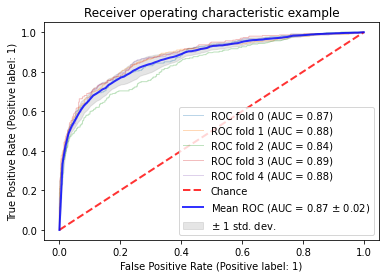

In [16]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X6.iloc[train], y6.iloc[train])
<ipython-input-19-a10fdbacf979>:12: Data

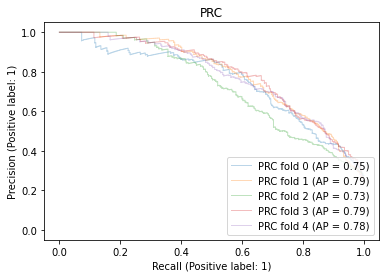

In [19]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X6, y6)):
    classifier.fit(X6.iloc[train], y6.iloc[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X6.iloc[test],
        y6.iloc[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [20]:
np.mean([0.75,0.79,0.73,0.79,0.78])

0.768

In [21]:
np.std([0.75,0.79,0.73,0.79,0.78])

0.02400000000000002

In [81]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

print('tag feature')
print(len(tag_features1))
#print(tag_features1)
print(len(tag_features0))
#print(tag_features0)

tag_features1 = [ft for ind,ft in enumerate(tag_features1) if len(ft) >1]
tag_features0 = [ft for ind,ft in enumerate(tag_features0) if len(ft) >1]

print(len(tag_features1))
print(len(tag_features0))

data = tag_features1 + tag_features0
label = [1 for ft in tag_features1] + [0 for ft in tag_features0]



vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(data)
y2 = np.array(label)

tag feature
5375
13977
5198
13826


In [82]:
#pickle.dump(vectorizer, open('webtag_tfidf', 'wb'))

In [83]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2, y2)

In [84]:
term_weights = dict(zip(vectorizer.get_feature_names_out(), classifier.feature_importances_))

In [85]:
dict(sorted(term_weights.items(), key=lambda item: item[1]))

{'awards': 0.0,
 'calls': 0.0,
 'classifications': 0.0,
 'fetch': 0.0,
 'flags': 0.0,
 'game': 0.0,
 'gameplay': 0.0,
 'hotness': 0.0,
 'include': 0.0,
 'kickstarter': 0.0,
 'links': 0.0,
 'marketplace': 0.0,
 'metaanalisis': 0.0,
 'play': 0.0,
 'polypad': 0.0,
 'promotedvideos': 0.0,
 'recs': 0.0,
 'submodule': 0.0,
 'tabs': 0.0,
 'xref': 0.0,
 'single': 1.84289575037266e-10,
 'mstyle': 1.2883229153450336e-09,
 'one': 2.572205547892341e-09,
 'ethos': 3.2913976103184157e-09,
 'lijacques': 5.299248657490958e-09,
 'subscription': 7.166637124281165e-09,
 'trabalho': 8.003214071968703e-09,
 'threads': 8.826819304866898e-09,
 'fans': 9.19358019807513e-09,
 'sociales': 9.64133727989136e-09,
 'leaderboard': 9.688931042552582e-09,
 'if': 9.894574461193811e-09,
 'persistent': 1.047764331915104e-08,
 'hist': 1.1306953043741168e-08,
 'literature': 1.1396320129934132e-08,
 'for': 1.2324716219784615e-08,
 'socio': 1.4541009488286139e-08,
 'mmultiscripts': 1.488436958524613e-08,
 'overview': 1.68107

In [88]:
#scaler = preprocessing.StandardScaler().fit(X2)
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X2, y2)
lr.coef_

array([[-1.18581594e-02,  3.05110041e-03,  2.45603096e-01,
        -7.71145800e-01, -6.10878430e-02, -1.13910890e-02,
        -9.82640851e-03, -3.43796092e-02, -3.83195871e-02,
        -1.75748227e+00,  4.54336572e-03,  1.51993836e-02,
         2.76636586e-01,  1.60206119e-01, -4.74556953e-03,
        -1.21366996e+00,  3.58840570e-01,  3.53848521e-02,
         1.48124912e-02, -7.02149650e-03, -1.29614388e-02,
        -1.98057843e-02,  1.62297290e-03, -1.23951543e-01,
        -1.46226866e-03, -4.74556953e-03, -1.13349053e-02,
        -1.45315104e-01,  2.07718858e-02, -5.87436611e-01,
        -4.40268982e-01, -7.90614622e-02, -4.74556953e-03,
        -8.51126414e-03, -4.43417313e-01, -3.28458399e-02,
        -1.43785331e+00,  1.67746061e+00, -3.28458399e-02,
         2.82821193e-05,  2.82821193e-05, -1.83128714e-02,
         1.08102516e-01, -3.28458399e-02, -2.55593691e+00,
        -8.52652969e-03, -1.33253119e-01,  8.59441154e-01,
         3.13539840e-01, -6.80900731e-03, -1.41676688e-0

In [92]:
term_sign = dict(zip(vectorizer.get_feature_names_out(), lr.coef_[0]))

In [113]:
term_sign['li']

1.865142667688465

In [58]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X2, y2)
pickle.dump(classifier, open('webtag_classifer', 'wb'))

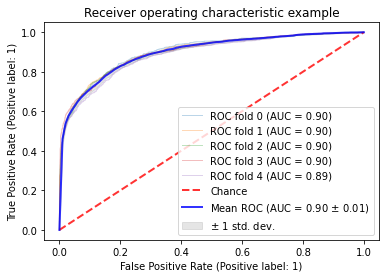

In [26]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

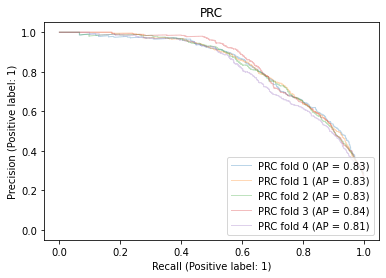

In [27]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [28]:
np.mean([0.83,0.83,0.83,0.84,0.81])

0.828

In [29]:
np.std([0.83,0.83,0.83,0.84,0.81])

0.00979795897113268

In [114]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)

print('font feature')
print(len(font_features1))
print(len(font_features0))
font_feature1 = [ft for ind,ft in enumerate(font_features1) if len(ft) > 0]
font_feature0 = [ft for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_feature = font_feature1 + font_feature0
label = [1 for ft in font_feature1] + [0 for ft in font_feature0]

print(len(font_feature1))
print(len(font_feature0))

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform([' '.join(ff) for ff in font_feature])
y3 = np.array(label)

font feature
5375
13977
2277
6749


In [115]:
#pickle.dump(vectorizer, open('webfont_tfidf', 'wb'))

In [116]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X3, y3)
term_weights = dict(zip(vectorizer.get_feature_names_out(), classifier.feature_importances_))
dict(sorted(term_weights.items(), key=lambda item: item[1]))

{'55roma': 0.0,
 'abril': 0.0,
 'bright': 0.0,
 'cairo': 0.0,
 'cherry': 0.0,
 'coda': 0.0,
 'din': 0.0,
 'ditty': 0.0,
 'exo2': 0.0,
 'extrabld': 0.0,
 'fatface': 0.0,
 'fontawesomeslick': 0.0,
 'frutiger': 0.0,
 'gfs': 0.0,
 'goudytwentyregular': 0.0,
 'kudryashov': 0.0,
 'lusitana': 0.0,
 'mdl2': 0.0,
 'metamorphous': 0.0,
 'momizat': 0.0,
 'museoslab500regular': 0.0,
 'mwf': 0.0,
 'orig_wix_madefor_text_regular': 0.0,
 'panton': 0.0,
 'smythe': 0.0,
 'swissra': 0.0,
 'tajawal': 0.0,
 'the': 0.0,
 'thesansuhh': 0.0,
 'thesansuhhbold': 0.0,
 'thesansuhhboldcaps': 0.0,
 'thesansuhhbolditalic': 0.0,
 'thesansuhhitalic': 0.0,
 'thesansuhhregularcaps': 0.0,
 'thesansuhhsemilightcaps': 0.0,
 'universroman': 0.0,
 'wf_6273ae5a6a0a43a88c1a7a047': 0.0,
 'wfont_e28ccf_515bc3734d9f447bafa4a28bc024f1b5': 0.0,
 'ヒラギノ角ゴpro': 0.0,
 'iconvault': 2.721979615852728e-10,
 'wfont_e28ccf_6273ae5a6a0a43a88c1a7a04793c7104': 4.4001282566761616e-10,
 'fjord': 1.5216068088315107e-09,
 'yekanywyw': 1.52416140

In [117]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X3, y3)
lr.coef_

array([[-1.58867154e-01, -1.80538155e-01,  9.56628725e-01,
        -5.32093224e-02, -1.98583943e-02, -4.23107404e-03,
        -3.03908633e-02,  8.43822243e-02, -9.71594369e-03,
        -1.19252959e-01, -8.44124581e-02, -8.44124581e-02,
        -1.98583943e-02, -5.93480893e-02,  9.70670180e-02,
        -5.06105089e-02, -3.63102662e-02, -1.01221018e-01,
        -3.03908633e-02, -7.14480509e-02, -1.98583943e-02,
         3.23556727e-02, -3.54239127e-01, -1.39663204e-01,
         3.66226260e-01, -5.06105089e-02, -7.14480509e-02,
        -7.39848320e-03, -1.98583943e-02,  4.09936819e-02,
         7.19386922e-01,  6.15479987e-01, -1.64837591e-01,
        -1.69536286e-01, -4.39978042e-02, -4.88329314e-02,
        -5.10540435e-02,  5.01447825e-01, -1.33459517e-02,
         6.08798680e-01, -2.17196607e-01,  8.05314751e-01,
         2.81416888e-01, -4.09575208e-02, -3.68488497e-03,
        -9.80486182e-01,  1.19878855e-01,  4.29175402e-02,
         2.48216039e-01,  5.44215646e-02, -9.26946959e-0

In [118]:
term_sign = dict(zip(vectorizer.get_feature_names_out(), lr.coef_[0]))

In [119]:
term_sign

{'0625em': -0.15886715429614864,
 '063em': -0.1805381554329534,
 '10': 0.9566287246938694,
 '120': -0.053209322382276956,
 '120em': -0.01985839428701858,
 '12px': -0.004231074037689956,
 '13': -0.030390863266238247,
 '27px': 0.08438222425160527,
 '3d': -0.009715943694109545,
 '40': -0.119252958557921,
 '400': -0.08441245813601421,
 '400italic': -0.08441245813601421,
 '40em': -0.01985839428701858,
 '45ligh': -0.05934808929527339,
 '45light': 0.09706701798224321,
 '55': -0.05061050886215991,
 '55roma': -0.03631026622749757,
 '55roman': -0.10122101772431982,
 '5px': -0.030390863266238247,
 '64': -0.07144805092247265,
 '64em': -0.01985839428701858,
 '65bold': 0.0323556726607478,
 '65medi': -0.35423912703601507,
 '67': -0.139663203799019,
 '700': 0.36622626038539546,
 '75bold': -0.05061050886215991,
 '90': -0.07144805092247265,
 '900': -0.007398483200698469,
 '90em': -0.01985839428701858,
 'a11y': 0.04099368190665986,
 'abeezee': 0.7193869224452389,
 'abel': 0.6154799874615371,
 'abril': -0

In [129]:
term_sign['neue']

-0.7214458734672509

In [33]:
len(label)

9026

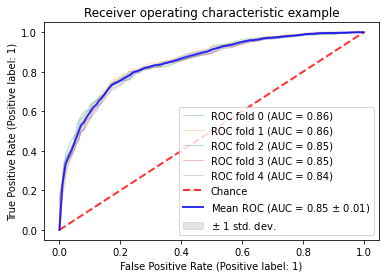

In [34]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

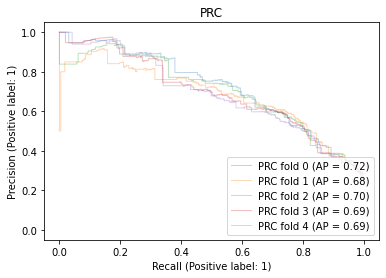

In [36]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
np.mean([0.72,0.68,0.70,0.69,0.69])

0.696

In [38]:
np.std([0.72,0.68,0.70,0.69,0.69])

0.013564659966250522

In [130]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

print('color feature')
#print(color_features1)
#print(color_features0)
color_features1 = [ft for ind,ft in enumerate(color_features1) if len(ft) ==5]
color_features0 = [ft for ind,ft in enumerate(color_features0) if len(ft) ==5]
website_colors = color_features1 + color_features0
label = [1 for ft in color_features1] + [0 for ft in color_features0]


vectorizer = TfidfVectorizer()
X4 = vectorizer.fit_transform([' '.join(set(ff)) for ff in website_colors])
y4 = np.array(label)

color feature


In [131]:
#pickle.dump(vectorizer, open('webcolor_tfidf', 'wb'))

In [132]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0).fit(X4,y4)
term_weights = dict(zip(vectorizer.get_feature_names_out(), classifier.feature_importances_))
dict(sorted(term_weights.items(), key=lambda item: item[1]))

{'aquamarine': 0.0,
 'chartreuse': 0.0,
 'mediumspringgreen': 0.0,
 'orchid': 0.0,
 'lightgreen': 1.3172529147397416e-06,
 'aqua': 1.7404467727335055e-06,
 'lightsalmon': 3.2455080348143254e-06,
 'papayawhip': 4.2407085322680986e-06,
 'lightgoldenrodyellow': 5.73121260925226e-06,
 'deeppink': 6.6808286495095146e-06,
 'azure': 7.517018315701793e-06,
 'mediumorchid': 8.821489533236399e-06,
 'palegreen': 9.053269677140451e-06,
 'cornsilk': 9.345348284098069e-06,
 'ivory': 1.5646015758580502e-05,
 'darkviolet': 1.5994076760467963e-05,
 'peachpuff': 1.7874985387177276e-05,
 'moccasin': 1.8991880096737433e-05,
 'blueviolet': 2.2989244096618287e-05,
 'pink': 2.5851255513901436e-05,
 'turquoise': 2.6527111088967112e-05,
 'lime': 2.8906601879605065e-05,
 'greenyellow': 3.995872490122702e-05,
 'lightpink': 4.039351124464225e-05,
 'blanchedalmond': 4.157077304007459e-05,
 'lavenderblush': 4.972305696421991e-05,
 'fuchsia': 5.3417267123569704e-05,
 'lightcoral': 5.553572979625132e-05,
 'plum': 5.7

In [133]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X4, y4)
lr.coef_

array([[ 0.65880268,  0.22975735, -0.30762502, -0.67501861,  0.11474013,
         0.88477729, -1.41573984,  0.79040254, -0.18989007,  0.38744004,
        -0.35921684, -0.93154892, -0.50677502, -0.18985349, -0.23070752,
         0.39053772,  0.20552397, -0.13231963, -0.53070687, -0.16657954,
        -0.43031799, -0.58205854,  0.0052952 , -0.48719703,  0.39200342,
         0.30161048, -0.5086535 , -0.21528298,  0.27123349,  0.44980704,
        -0.68934402, -0.66691926,  0.02008793, -0.04752488, -0.72682498,
        -0.62050221, -0.90850597, -0.52745512,  1.5197115 , -0.33096831,
         1.14875265,  1.47103295,  0.12131913, -0.35782081,  0.53455861,
         0.21624626,  0.02410698, -0.28194585, -0.87364541, -0.56268391,
         0.494405  , -0.97318645,  0.40554321,  0.82140416,  0.1749185 ,
        -0.30327172, -1.15389194, -0.08464713,  0.14505525, -0.21518376,
         0.75418072,  0.24656418,  0.01228693, -0.12409428, -0.06922967,
        -1.0184443 , -0.37370324, -1.1542142 , -0.9

In [134]:
term_sign = dict(zip(vectorizer.get_feature_names_out(), lr.coef_[0]))

In [135]:
term_sign

{'aliceblue': 0.6588026849224059,
 'antiquewhite': 0.22975734576682624,
 'aqua': -0.30762501998115577,
 'aquamarine': -0.6750186086677843,
 'azure': 0.11474012636064962,
 'beige': 0.8847772876856064,
 'bisque': -1.4157398406950106,
 'black': 0.7904025447474089,
 'blanchedalmond': -0.18989006657160817,
 'blue': 0.38744004289941525,
 'blueviolet': -0.35921683883595185,
 'brown': -0.9315489164448935,
 'burlywood': -0.5067750241158837,
 'cadetblue': -0.18985348606781105,
 'chartreuse': -0.23070752465368333,
 'chocolate': 0.3905377163788009,
 'coral': 0.20552396679284266,
 'cornflowerblue': -0.1323196319786381,
 'cornsilk': -0.5307068711417501,
 'crimson': -0.16657954425594004,
 'darkblue': -0.43031799170594026,
 'darkcyan': -0.5820585356252,
 'darkgoldenrod': 0.005295201686960056,
 'darkgray': -0.4871970348143154,
 'darkgreen': 0.39200341779471576,
 'darkkhaki': 0.3016104766586001,
 'darkmagenta': -0.5086534958465392,
 'darkolivegreen': -0.21528297991231535,
 'darkorange': 0.27123348719589

In [145]:
term_sign['darkgray']

-0.4871970348143154

In [46]:
len(website_colors)

18530

In [47]:
len(label)

18530

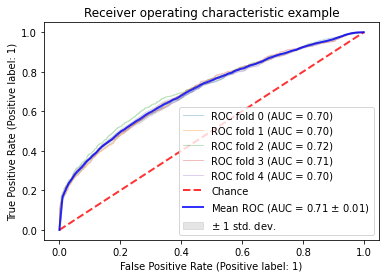

In [48]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20, n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X4, y4)):
    classifier.fit(X4[train], y4[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X4[test],
        y4[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

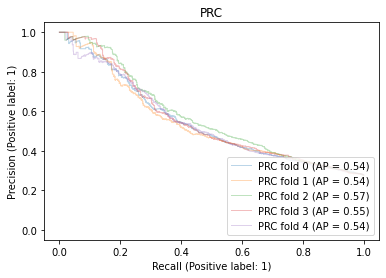

In [49]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X4, y4)):
    classifier.fit(X4[train], y4[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X4[test],
        y4[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [50]:
np.mean([0.54,0.54,0.57,0.55,0.54])

0.548

In [51]:
np.std([0.54,0.54,0.57,0.55,0.54])

0.01166190378969057

In [37]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score

<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

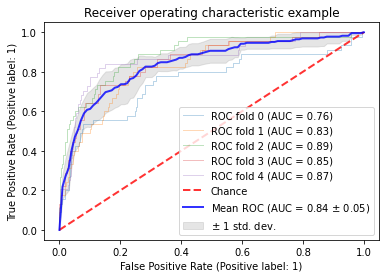

In [54]:
cv = StratifiedKFold(n_splits=5)
classifier1 = RandomForestClassifier(max_depth=5, random_state=0)
classifier2 = RandomForestClassifier(max_depth=5, random_state=0)
classifier3 = RandomForestClassifier(max_depth=5, random_state=0)
classifier4 = RandomForestClassifier(max_depth=5, random_state=0)
classifier = LogisticRegression(random_state=0)
#classifier = RandomForestClassifier(max_depth = 10,n_estimators =500, random_state=0)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
   
    XX = []
    clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
    F1 = clf1.predict_proba(X1.iloc[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F1))
    clf2 = classifier2.fit(X2[train], y2[train])
    F2 = clf2.predict_proba(X2[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F2))
    clf3 = classifier3.fit(X3[train], y3[train])
    F3 = clf3.predict_proba(X3[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F3))
    clf4 = classifier4.fit(X4[train], y4[train])
    F4 = clf4.predict_proba(X4[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F4))
    
    XX0 = []
    X01 = clf1.predict_proba(X1.iloc[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X01))
    X02 = clf2.predict_proba(X2[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X02))
    X03 = clf3.predict_proba(X3[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X03))
    X04 = clf4.predict_proba(X4[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X04))
    
    for ind, xx in enumerate(F1):
        #XX.append([F1[ind],F2[ind],F3[ind]])
        XX.append([F1[ind],F2[ind],F3[ind],F4[ind]])
        #XX.append([F1[ind]])
    
    for ind, xx in enumerate(X01):
        #XX0.append([X01[ind],X02[ind],X03[ind]])
        XX0.append([X01[ind],X02[ind],X03[ind],X04[ind]])
        #XX0.append([X01[ind]])
        
    
    
    classifier.fit(XX, np.array(y1)[train])
    #print(classifier.coef_)
    #print(len(XX0))
    #print(np.array(XX0)[test])
    
    viz = RocCurveDisplay.from_estimator(
        classifier,
        np.array(XX0),
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

# Connect different features into one feature to predict

In [22]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [23]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [24]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        for t in tmp:
            #print(t)
            if len(t) == 2 and len(t[1]) == 0:
                dt = [0]
            elif len(t) !=0:
                tt = []
                for c in t:
                    if len(c) == 10:
                        tt.append(c)
                   
                #print(tt)
                if len(tt) != 0:
                    dt = np.mean(np.array(tt), axis=0)
                else:
                    dt = [0]
                #print(len(dt))
            abs_features1.append(dt)
            
        #dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        #abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
    
        tmp = pickle.load(f)
     
        for t in tmp:
            #print(t)
            if len(t) == 2 and len(t[1]) == 0:
                dt = [0]
            elif len(t) !=0:
                tt = []
                for c in t:
                    if len(c) == 10:
                        tt.append(c)
              
                #print(tt)
                if len(tt) != 0:
                    dt = np.mean(np.array(tt), axis=0)
                else:
                    dt = [0]
                #print(len(dt))
                
            abs_features0.append(dt)
        
    
        
        #dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        #abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]


In [25]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [26]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [27]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [28]:
len(web_features1),len(web_features0),

(5375, 13977)

In [29]:
len(abs_features1),len(abs_features0),

(5375, 13977)

In [30]:
len(tag_features1),len(tag_features0),

(5375, 13977)

In [31]:
len(font_features1),len(font_features0),

(5375, 13977)

In [32]:
len(color_features1),len(color_features0),

(5375, 13977)

In [33]:
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [34]:
bibilometrics.head(3)

,JournalId,NormalizedName,Issn,Reason,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,2764959905,austrian journal of humanities and social scie...,Unknown,A,1364,48,48,2012,1.000000,1.000000,...,122,83,28,12,0,0,0,0,1,0
1,2764494681,austrian journal of technical and natural scie...,Unknown,A,826,36,36,2014,1.880952,2.058824,...,193,214,52,21,0,1,0,0,3,0
2,2764967488,european journal of arts,Unknown,A,372,5,5,2015,1.000000,1.000000,...,13,7,2,1,0,0,0,0,0,0


In [35]:
white_bib = bibilometrics[bibilometrics['Reason'] == 'Still in DOAJ index'].drop(columns=['JournalId','Issn','NormalizedName','Reason'])
white_bib['label'] = 0
unwhite_bib = bibilometrics[bibilometrics['Reason'] != 'Still in DOAJ index'].drop(columns=['JournalId','Issn','NormalizedName','Reason'])
unwhite_bib['label'] = 1

In [36]:
white_bib.shape

(4281, 23)

In [37]:
unwhite_bib.shape

(1502, 23)

In [39]:
labeled_journals = pd.read_csv('merge_journal_list_interesting_url_all_unique_normalizedname.csv')

In [40]:
labeled_journals.head(3)

,Journal Title,ISSN,Reason,Journal Title Normalized,URL,Data Source,added,Remove_Date,Add_Date,reason_category
0,Journal of Algebraic Systems,NaN,Still in DOAJ index,journal of algebraic systems,http://jas.shahroodut.ac.ir/,DOAJ,1.0,1300-01-01 00:00:00,2019-01-26 00:00:00,interesting reason
1,Revista Pró-UniverSUS,NaN,Still in DOAJ index,revista pró-universus,http://editora.universidadedevassouras.edu.br/...,DOAJ,1.0,1300-01-01 00:00:00,2019-05-08 00:00:00,interesting reason
2,Austrian Journal of Humanities and Social Scie...,Unknown,A,austrian journal of humanities and social scie...,https://ew-a.org/journals/61/,Gray OA,NaN,NaN,NaN,interesting reason


In [41]:
labeled_journals.shape

(19352, 10)

In [43]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([0]*22)
    counter += 1
        


22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

In [44]:
counter

13977

In [45]:
len(bib_features_ind0)

4255

In [46]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([0]*22)
    counter += 1

In [47]:
counter

5375

In [48]:
len(bib_features0),len(bib_features1)

(13977, 5375)

In [49]:
web_features_ind0 = [ind for ind,ft in enumerate(web_features0) if len(ft) >9]
web_features_ind1 = [ind for ind,ft in enumerate(web_features1) if len(ft) >9]

In [50]:
abs_features_ind0 = [ind for ind,ft in enumerate(abs_features0) if len(ft) >9]
abs_features_ind1 = [ind for ind,ft in enumerate(abs_features1) if len(ft) >9]

In [51]:
tag_features_ind0 = [ind for ind,ft in enumerate(tag_features0) if len(ft) >1]
tag_features_ind1 = [ind for ind,ft in enumerate(tag_features1) if len(ft) >1]

In [52]:
font_features_ind0 = [ind for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_features_ind1 = [ind for ind,ft in enumerate(font_features1) if len(ft) > 0]

In [53]:
color_features_ind0 = [ind for ind,ft in enumerate(color_features0) if len(ft) ==5]
color_features_ind1 = [ind for ind,ft in enumerate(color_features1) if len(ft) ==5]

In [54]:
len(bib_features_ind1),len(bib_features_ind0),

(1493, 4255)

In [55]:
len(web_features_ind1),len(web_features_ind0),

(4801, 9484)

In [56]:
len(abs_features_ind1),len(abs_features_ind0),

(3498, 6736)

In [57]:
len(tag_features_ind1),len(tag_features_ind0),

(5198, 13826)

In [58]:
len(font_features_ind1),len(font_features_ind0),

(2277, 6749)

In [59]:
len(color_features_ind1),len(color_features_ind0),

(5083, 13447)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectorizer = TfidfVectorizer()

In [62]:
web_features_use = []
bib_features_use = []
abs_features_use = []
tag_features_use = []
font_features_use = []
color_features_use = []
label = []

In [63]:
for ind,v in enumerate(zip(web_features0,bib_features0,abs_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if ind in web_features_ind0 and ind in bib_features_ind0 and ind in abs_features_ind0 and ind in tag_features_ind0 and ind in font_features_ind0 and ind in color_features_ind0:
        web_features_use.append(w)
        bib_features_use.append(b)
        abs_features_use.append(a)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(0)

In [64]:
len(web_features_use)

1345

In [65]:
for ind,v in enumerate(zip(web_features1,bib_features1,abs_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if ind in web_features_ind1 and ind in bib_features_ind1 and ind in abs_features_ind1 and ind in tag_features_ind1 and ind in font_features_ind1 and ind in color_features_ind1:
        web_features_use.append(w)
        bib_features_use.append(b)
        abs_features_use.append(a)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(1)

In [66]:
len(web_features_use)

1739

In [67]:
content_x = web_features_use

In [68]:
bib_x = bib_features_use

In [69]:
abstract_x = abs_features_use

In [70]:
tag_x = vectorizer.fit_transform(tag_features_use).todense()

In [71]:
len(tag_x[0].tolist()[0])

308

In [72]:
font_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use]).todense()

In [73]:
color_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use]).todense()

In [74]:
X = []

In [75]:
abstract_x[0].tolist()

[20.05,
 17.46,
 17.69,
 16.175000000000004,
 11.379000000000001,
 20.250000000000004,
 57.3,
 18.5025,
 18.433,
 15.619999999999996]

In [76]:
for ind,w in enumerate(web_features_use):
    X.append(w+bib_x[ind]+abstract_x[ind].tolist()+tag_x[ind].tolist()[0]+font_x[ind].tolist()[0]+color_x[ind].tolist()[0])

In [77]:
len(content_x)

1739

In [78]:
len(X)

1739

In [79]:
len(label)

1739

In [80]:
bib_x[0]

[34.0,
 158.0,
 158.0,
 2015.0,
 9.05501567398119,
 6.0,
 7.794117647058823,
 7.119501100751101,
 778.0,
 203.0,
 32.0,
 94.0,
 3021.0,
 867.0,
 491.0,
 254.0,
 3.0,
 15.0,
 12.0,
 3.0,
 6.0,
 7.0]

In [82]:
import numpy as np

In [83]:
X2 = np.array(X)
y2 = np.array(label)

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

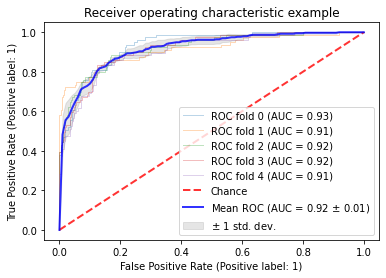

In [85]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [86]:
from sklearn.metrics import PrecisionRecallDisplay

#display = PrecisionRecallDisplay.from_estimator(
#    classifier, X_test, y_test, name="LinearSVC"
#)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

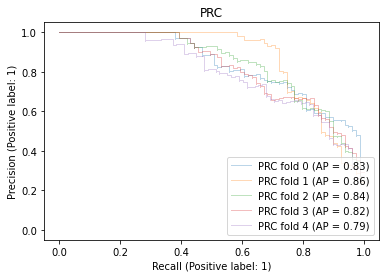

In [87]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [88]:
np.mean([0.83,0.86,0.84,0.82,0.79])

0.828

In [89]:
np.std([0.83,0.86,0.84,0.82,0.79])

0.023151673805580437

# Stack Models

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
content_train0, content_test, content_y0, content_ytest =  train_test_split(content_x, label, test_size = 0.2,random_state=6)
content_train1, content_train2,content_ytr1, content_ytr2 =  train_test_split(content_train0,content_y0, test_size = 0.5,random_state=6)

In [92]:
content_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train1,content_ytr1)

In [93]:
content_input_x = content_classifier.predict_proba(content_train2)[:,1]

In [94]:
len(content_input_x)

696

In [95]:
np.mean(content_ytr2)

0.21839080459770116

In [96]:
bib_train0, bib_test, bib_y0, bib_ytest =  train_test_split(bib_x, label, test_size = 0.2,random_state=6)
bib_train1, bib_train2, bib_ytr1, bib_ytr2 =  train_test_split(bib_train0,bib_y0, test_size = 0.5,random_state=6)

In [97]:
bib_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(bib_train1,bib_ytr1)

In [98]:
bib_input_x = bib_classifier.predict_proba(bib_train2)[:,1]

In [99]:
len(bib_input_x)

696

In [100]:
abstract_train0, abstract_test, abstract_y0, abstract_ytest = train_test_split(abstract_x,label, test_size = 0.2,random_state=6)
abstract_train1, abstract_train2,abstract_ytr1, abstract_ytr2 = train_test_split(abstract_train0,abstract_y0, test_size = 0.5,random_state=6)

In [101]:
abstract_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(abstract_train1,abstract_ytr1)

In [102]:
abstract_input_x = abstract_classifier.predict_proba(abstract_train2)[:,1]

In [103]:
np.mean(abstract_ytr2)

0.21839080459770116

In [104]:
tag_train0, tag_test, tag_y0, tag_ytest =  train_test_split(tag_x, label, test_size = 0.2,random_state=6)
tag_train1, tag_train2,tag_ytr1, tag_ytr2 =  train_test_split(tag_train0,tag_y0, test_size = 0.5,random_state=6)

In [105]:
tag_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train1,tag_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [106]:
tag_input_x = tag_classifier.predict_proba(tag_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [107]:
np.mean(tag_ytr2)

0.21839080459770116

In [108]:
font_train0, font_test, font_y0, font_ytest =  train_test_split(font_x, label, test_size = 0.2,random_state=6)
font_train1, font_train2,font_ytr1, font_ytr2 =  train_test_split(font_train0,font_y0, test_size = 0.5,random_state=6)

In [109]:
font_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(font_train1,font_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [110]:
font_input_x = font_classifier.predict_proba(font_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [111]:
color_train0, color_test, color_y0, color_ytest =  train_test_split(color_x, label, test_size = 0.2,random_state=6)
color_train1, color_train2,color_ytr1, color_ytr2 =  train_test_split(color_train0,color_y0, test_size = 0.5,random_state=6)

In [112]:
color_classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6).fit(color_train1,color_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [113]:
color_input_x = color_classifier.predict_proba(color_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
XX = []

In [116]:
for ind,w in enumerate(content_input_x):
    XX.append([w,bib_input_x[ind],abstract_input_x[ind], tag_input_x[ind], font_input_x[ind], color_input_x[ind]])

In [117]:
XX[0]

[0.138242118226601,
 0.104,
 0.22207999999999997,
 0.06199046594891478,
 0.13105724469859414,
 0.3020361233761805]

In [118]:
from sklearn.metrics import average_precision_score

In [119]:
clf = LogisticRegression(random_state=0).fit(XX, color_ytr2)
print(clf.classes_)
y_scores = clf.predict_proba(XX)[:,1]

[0 1]


In [120]:
clf.coef_

array([[1.46143223, 4.77287022, 1.94998765, 2.43894664, 1.28120173,
        0.64319018]])

In [121]:
#average_precision_score(color_ytr2, y_scores)

In [122]:
from sklearn.metrics import roc_auc_score

#roc_auc_score(color_ytr2, y_scores)

In [123]:
content_input_test_x = content_classifier.predict_proba(content_test)[:,1]

In [124]:
bib_input_test_x = bib_classifier.predict_proba(bib_test)[:,1]

In [125]:
abstract_input_test_x = abstract_classifier.predict_proba(abstract_test)[:,1]

In [126]:
tag_input_test_x = tag_classifier.predict_proba(tag_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [127]:
font_input_test_x = font_classifier.predict_proba(font_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [128]:
color_input_test_x = color_classifier.predict_proba(color_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [129]:
XXX = []

In [130]:
for ind,w in enumerate(content_input_test_x):
    XXX.append([w,bib_input_test_x[ind],abstract_input_test_x[ind], tag_input_test_x[ind], font_input_test_x[ind], color_input_test_x[ind]])

In [131]:
y_scores = clf.predict_proba(XXX)[:,1]

In [132]:
average_precision_score(color_ytest, y_scores)

0.8413852562159249

In [133]:
roc_auc_score(font_ytest, y_scores)

0.9194480102695763

In [134]:
roc_auc_score(color_ytest, y_scores)

0.9194480102695763

# Do data imputation

In [1]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
web_features_use2 = []
bib_features_use2 = []
abstract_features_use2 = []
tag_features_use2 = []
font_features_use2 = []
color_features_use2 = []
label2 = []

In [4]:
web_features1 = []
web_features0 = []
tmp = []

for batch in range(0,100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [5]:
abs_features1 = []
abs_features0 = []


for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = []
        for t in tmp:
            if len(t) ==0:
                dt.append([[0] * 10])
            else:
                ttt = []
                for tt in t:
                    if len(tt) == 10:
                        ttt.append(tt)
                    else:
                        ttt.append([0] * 10)
                dt.append(ttt)

        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]
        
for batch in range(100):
    with open('./labeled_feature_data_local_html/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = []
        for t in tmp:
            if len(t) ==0:
                dt.append([[0] * 10])
            else:
                ttt = []
                for tt in t:
                    if len(tt) == 10:
                        ttt.append(tt)
                    else:
                        ttt.append([0] * 10)
                dt.append(ttt)

        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

In [6]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [7]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [8]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data_local_html/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data_local_html/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [9]:
labeled_journals = pd.read_csv('merge_journal_list_interesting_url_all_unique_normalizedname.csv')
#drop two duplicated columns: save value but different column name
bibilometrics = pd.read_csv('labeled_journals_biblio_features_all.csv').drop(columns=['journal_paper_cited_num','journal_journal_reference_num'])

In [11]:
bib_features0 = []
bib_features_ind0 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] == 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features0.append(val)
        bib_features_ind0.append(counter)
    else:
        bib_features0.append([0]*22)
    counter += 1

In [12]:
bib_features1 = []
bib_features_ind1 = []
counter = 0
for ind,row in labeled_journals[labeled_journals['Reason'] != 'Still in DOAJ index'].iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName','Reason']).values.tolist()[0]
        #print(val)
        #print(len(val))
        bib_features1.append(val)
        bib_features_ind1.append(counter)
    else:
        bib_features1.append([0]*22)
    counter += 1

In [13]:
len(web_features0)

13977

In [14]:
len(bib_features0)

13977

In [15]:
for ind,v in enumerate(zip(web_features0,bib_features0,abs_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    
    if len(b) == 22:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([0]*22)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0,0])
    if len(a) == 10:
        abstract_features_use2.append(a)
    else:
        abstract_features_use2.append([0]* 10)
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if len(f) > 1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if len(c) > 1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(0)

In [16]:
len(label2)

13977

In [17]:
for ind,v in enumerate(zip(web_features1,bib_features1,abs_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    b = v[1]
    a = v[2]
    t = v[3]
    f = v[4]
    c = v[5]
    if len(b) == 22:
        bib_features_use2.append(b)
    else:
        bib_features_use2.append([0]*22)
    if len(w) > 9:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0,0])
    if len(a) == 10:
        abstract_features_use2.append(a)
    else:
        abstract_features_use2.append([0]* 10)
    if len(t) > 1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if len(f) > 1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if len(c) > 1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(1)

In [18]:
len(label2)

19352

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [21]:
pickle.dump(vectorizer, open('tag_tfidf_curr', 'wb'))

In [22]:
font_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use2]).todense()

In [23]:
pickle.dump(vectorizer, open('font_tfidf', 'wb'))

In [24]:
color_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use2]).todense()

In [25]:
pickle.dump(vectorizer, open('color_tfidf', 'wb'))

In [30]:
X2 = []

In [31]:
list(abstract_features_use2[0])

[-50.02, 21.0, 0.0, 20.83, 14.31, 17.8, 2.0, 2.5, 27.87, 0.32]

In [32]:
len(tag_x2[0].tolist()[0])

749

In [33]:
for ind,w in enumerate(web_features_use2):
    tmp = w+bib_features_use2[ind]+list(abstract_features_use2[ind])+tag_x2[ind].tolist()[0]+font_x2[ind].tolist()[0]+color_x2[ind].tolist()[0]
    #print(len(tmp))
    #print(len(bib_features_use2[ind]))
    X2.append(tmp)

In [34]:
len(X2[0])

1893

In [35]:
len(X2)

19352

In [36]:
X3 = np.array(X2)
y3 = np.array(label2)

In [37]:
len(web_features_use2)

19352

In [38]:
len(X2)

19352

In [39]:
X3[0]

array([23.12, 13.6 , 13.6 , ...,  0.  ,  0.  ,  0.  ])

In [40]:
np.mean(y3)

0.27774906986358

In [41]:
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)

In [42]:
classifier.fit(X3,y3)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=6, random_state=0)

In [43]:
pickle.dump(classifier, open('all_features_imputed_randomforest', 'wb'))

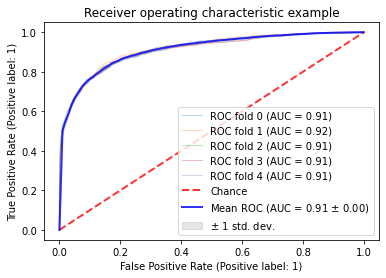

In [44]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
  
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [45]:
set(y3)

{0, 1}

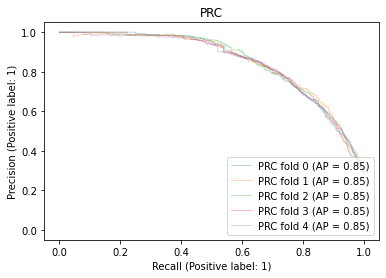

In [46]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

In [50]:
np.mean([0.85,0.85,0.85,0.85,0.85])

0.852

In [52]:
np.std([0.85,0.85,0.85,0.85,0.85])

0.0040000000000000036